<a href="https://colab.research.google.com/github/ArshanBhanage/Clustering/blob/main/K_Means_algorithm_using_Python_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means algorithm using Python from scratch.

K Means algorithm is an unsupervised learning algorithm, ie. it needs no training data, it performs the computation on the actual dataset. This should be apparent from the fact that in K Means, we are just trying to group similar data points into clusters, there is no prediction involved.

**k-Means Clustering works:**

1)The K Means algorithm is iterative based, it repeatedly calculates the cluster centroids, refining the values until they do not change much.

The k-means algorithm takes a dataset of ‘n’ points as input, together with an integer parameter ‘k’ specifying how many clusters to create(supplied by the programmer). The output is a set of ‘k’ cluster centroids and a labeling of the dataset that maps each of the data points to a unique cluster.

K Means Math

The math:
2) k centroids in the dataset. Then it calculates the distance of each point to each centroid. Each centroid represents a cluster and the points closest to the centroid are assigned to the cluster.

3) The centroid values are recalculated, usually taking the arithmetic mean of all points in the cluster.

4) After the new values of centroid are found, the algorithm performs the same set of steps over and over again until the differences between old centroids and the new centroids are negligible.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from datasets import load_dataset


**1. Read Training Data**

Using pandas to read the file

In [ ]:
# Load the Iris dataset from Hugging Face
dataset = load_dataset("BIT/iris-dataset")
df = dataset['train'].to_pandas()
df.head()

**Apply Scatter plot to visualize after reading data to check each row **

Text(0, 0.5, 'Petal Width')

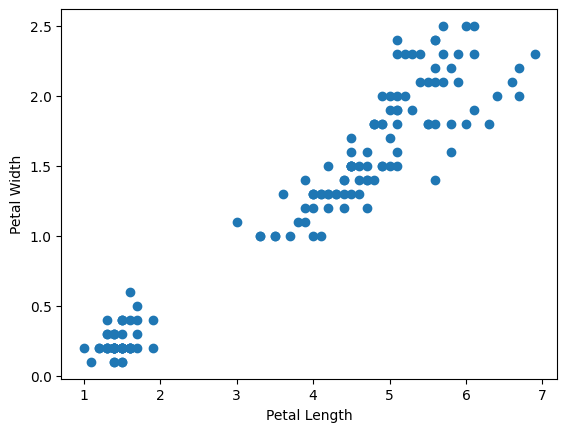

In [ ]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#Encode Categorical Values
Not all data can be presented as numbers in our data set. Furthermore, KMeans does not work with textual data therefore the data has to be encoded to numerical values. To elaborate, area and gender features are represented as text fields. We can use label encoders to convert text to numbers:

In [ ]:
km = KMeans(n_clusters=3, random_state=0) # Added random_state for reproducibility
# Use all four numerical features for K-Means
y_predicted = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
km.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

Text(0.5, 1.0, 'Cluster Centers (Petal Length vs Petal Width)')

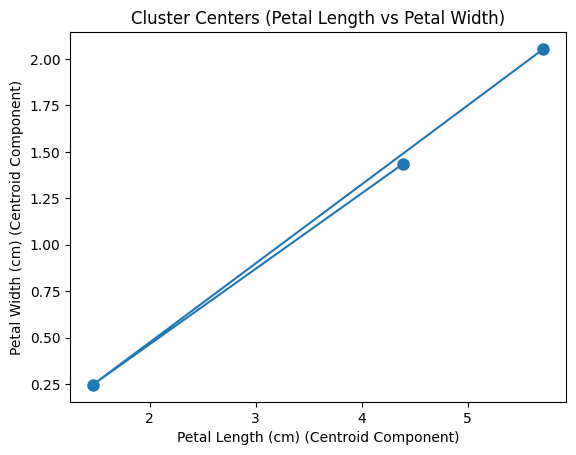

In [ ]:
# Plotting specific components of cluster centers for visualization consistency
# Here, we plot the petal_length (index 2) and petal_width (index 3) components
plt.plot(km.cluster_centers_[:,2], km.cluster_centers_[:,3], 'o-', markersize=8)
plt.xlabel('Petal Length (cm) (Centroid Component)')
plt.ylabel('Petal Width (cm) (Centroid Component)')
plt.title('Cluster Centers (Petal Length vs Petal Width)')

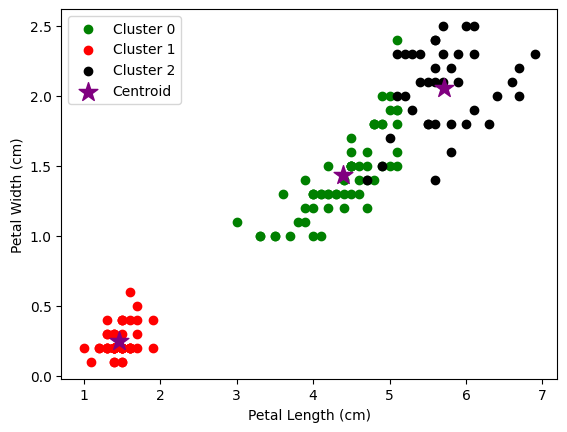

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# Plotting with petal length and petal width
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green', label='Cluster 0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red', label='Cluster 1')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black', label='Cluster 2')
# Plotting centroids on the same 2D projection
# Note: km.cluster_centers_ has 4 dimensions, we are only plotting the 3rd and 4th dimensions (index 2 and 3)
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='purple',marker='*',label='Centroid', s=200)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

**Preprocessing using min max scaler**

In [ ]:
scaler = MinMaxScaler()

# Scale all four features
features_to_scale = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for feature in features_to_scale:
    scaler.fit(df[[feature]])
    df[feature] = scaler.transform(df[[feature]])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.034483,0.090909,0
1,Michael,0.103448,0.128015,0
2,Mohan,0.103448,0.074212,0
3,Ismail,0.068966,0.072356,0
4,Kory,0.551724,0.239332,2


Text(0, 0.5, 'Petal Width (Scaled)')

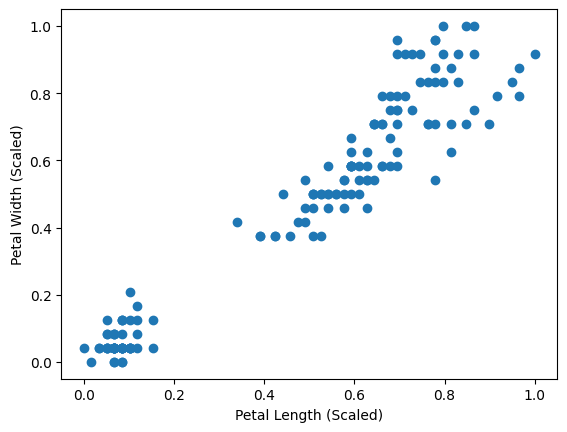

In [ ]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Petal Length (Scaled)')
plt.ylabel('Petal Width (Scaled)')

In [ ]:
km = KMeans(n_clusters=3, random_state=0) # Added random_state for reproducibility
# Use all four scaled numerical features for K-Means
y_predicted = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1


In [ ]:
km.cluster_centers_


array([[0.41203704, 0.27690972, 0.55896893, 0.52083333],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.66773504, 0.44310897, 0.7571708 , 0.78205128]])

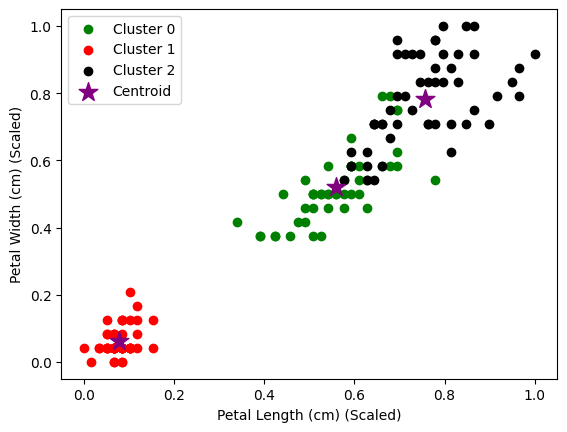

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# Plotting with scaled petal length and petal width
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green', label='Cluster 0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red', label='Cluster 1')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black', label='Cluster 2')
# Plotting centroids on the same 2D projection
# Note: km.cluster_centers_ has 4 dimensions, we are only plotting the 3rd and 4th dimensions (index 2 and 3)
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='purple',marker='*',label='Centroid', s=200)
plt.xlabel('Petal Length (cm) (Scaled)')
plt.ylabel('Petal Width (cm) (Scaled)')
plt.legend()

#Elbow Plot
The technique to determine K, the number of clusters, is called the elbow method.``

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=0) # Added random_state for reproducibility
    # Use all four scaled numerical features for K-Means
    km.fit(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

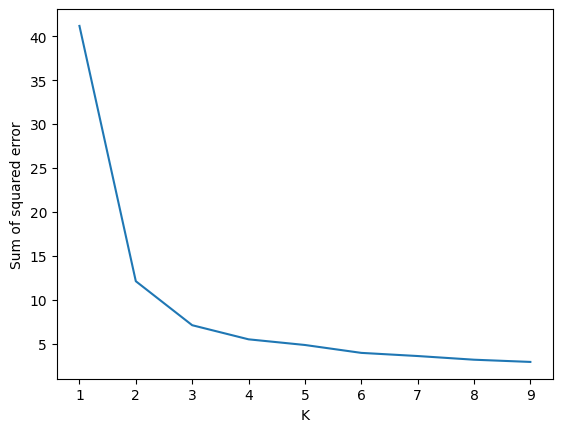

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)